In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from PIL import Image
import os

from sklearn.metrics import accuracy_score

In [8]:
data = []
labels = []

height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width * channels

In [9]:
Cells = np.load("./processed_data/data_train.npy")
labels = np.load("./processed_data/labels_train.npy")


# Spliting the images into train and validation sets
(X_train, X_val) = Cells[(int)(0.2 * len(labels)):], Cells[:(int)(0.2 * len(labels))]
X_train = X_train.astype('float32') / 255
X_val = X_val.astype('float32') / 255
(y_train, y_val) = labels[(int)(0.2 * len(labels)):], labels[:(int)(0.2 * len(labels))]

# Using one hote encoding for the train and validation labels
from keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)


In [10]:
# Definition of the DNN model

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


Epoch 1/5
981/981 [==============================] - 37s 37ms/step - loss: 1.0387 - accuracy: 0.7111 - val_loss: 17.2024 - val_accuracy: 0.1629
Epoch 2/5
981/981 [==============================] - 37s 38ms/step - loss: 0.1822 - accuracy: 0.9445 - val_loss: 22.1904 - val_accuracy: 0.1928
Epoch 3/5
981/981 [==============================] - 36s 36ms/step - loss: 0.1084 - accuracy: 0.9682 - val_loss: 23.5527 - val_accuracy: 0.2019
Epoch 4/5
981/981 [==============================] - 36s 37ms/step - loss: 0.0777 - accuracy: 0.9772 - val_loss: 29.1317 - val_accuracy: 0.2043
Epoch 5/5
981/981 [==============================] - 35s 36ms/step - loss: 0.0646 - accuracy: 0.9802 - val_loss: 21.8207 - val_accuracy: 0.2095


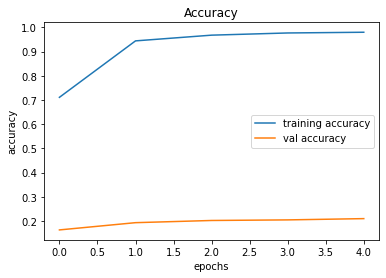

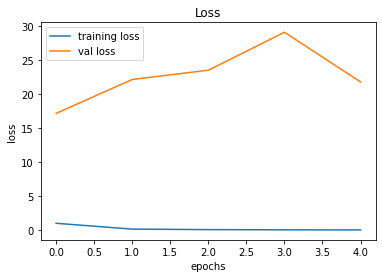

In [11]:
# using ten epochs for the training and saving the accuracy for each epoch
epochs = 5
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    validation_data=(X_val, y_val))

# Display of the accuracy and the loss values
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()


In [14]:
# Predicting with the test data
labels = np.load("./processed_data/labels_test.npy")


X_test = np.load("./processed_data/data_test.npy")

#pred = model.predict_classes(X_test)
pred = np.argmax(model.predict(X_test), axis=-1)
# Accuracy with the test data

In [15]:
accuracy_score(y_test, pred)

0.7866983372921615